In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
mpl.rcParams['patch.force_edgecolor'] = True
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 1.1 - Python Coding and Data Set

In [0]:
# load the data set
df = pd.read_csv("breast-cancer.csv")

df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [0]:
# load headers
with open("field_names.txt") as f:
  header_titles = f.read().split("\n")

print(header_titles)

['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimension_worst']


In [0]:
# attach headers to the data frame
df.columns = header_titles
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [0]:
# There is no missing value in the data set
df.isnull().sum()

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

In [0]:
# check data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
ID                            568 non-null int64
diagnosis                     568 non-null object
radius_mean                   568 non-null float64
radius_sd_error               568 non-null float64
radius_worst                  568 non-null float64
texture_mean                  568 non-null float64
texture_sd_error              568 non-null float64
texture_worst                 568 non-null float64
perimeter_mean                568 non-null float64
perimeter_sd_error            568 non-null float64
perimeter_worst               568 non-null float64
area_mean                     568 non-null float64
area_sd_error                 568 non-null float64
area_worst                    568 non-null float64
smoothness_mean               568 non-null float64
smoothness_sd_error           568 non-null float64
smoothness_worst              568 non-null float64
compactness_mean              5

All the fields are of type float64 exept diagnosis. So we need categorical encoding

In [0]:
# categorical encoding of the labels
df["diagnosis"].unique() # check unique values in the diagnosis column

array(['M', 'B'], dtype=object)

In [0]:
# Diagnosis = 1 if it is M otherwise it is 0
df["diagnosis"] = df["diagnosis"].apply(lambda s: 1 if s=="M" else 0)

df.head() # check data frame

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [0]:
# check the number of benign and malignant tumors 
df["diagnosis"].value_counts()

0    357
1    211
Name: diagnosis, dtype: int64

In [0]:
print("Mean smoothness (benign (0) and malignant (1) ): ")
smooth_mean = df.groupby("diagnosis")["smoothness_mean"].mean()
print(smooth_mean)
print("="*60)
print("Median smoothness (benign (0) and malignant (1) ): ")
smooth_median = df.groupby("diagnosis")["smoothness_mean"].median()
print(smooth_median)

Mean smoothness (benign (0) and malignant (1) ): 
diagnosis
0    2.000321
1    4.303716
Name: smoothness_mean, dtype: float64
Median smoothness (benign (0) and malignant (1) ): 
diagnosis
0    1.851
1    3.654
Name: smoothness_mean, dtype: float64


In [0]:
print("Mean compactness (benign (0) and malignant (1) ): ")
compactness_mean = df.groupby("diagnosis")["compactness_mean"].mean()
print(compactness_mean)
print("="*60)
print("Median compactness (benign (0) and malignant (1) ): ")
compactness_median = df.groupby("diagnosis")["compactness_mean"].median()
print(compactness_median)

Mean compactness (benign (0) and malignant (1) ): 
diagnosis
0    0.021438
1    0.032202
Name: compactness_mean, dtype: float64
Median compactness (benign (0) and malignant (1) ): 
diagnosis
0    0.01631
1    0.02855
Name: compactness_mean, dtype: float64


The mean and median are different

In [0]:
# Write a function to generate bootstrap samples of the data
# draw n samples with replacement

def generate_bootstrap(data_frame, n):
  sample_with_replacement = data_frame.sample(n=n,replace=True)
  return sample_with_replacement

print("Dataset 1:")
print(generate_bootstrap(df, 5)) 
print("Dataset 2:")
print(generate_bootstrap(df, 5)) 
print("Dataset 3:")
print(generate_bootstrap(df, 5)) 


Dataset 1:
           ID  diagnosis  ...  fractal_dimension_sd_error  fractal_dimension_worst
191    875099          0  ...                      0.1909                  0.06559
285   8912909          0  ...                      0.2465                  0.09981
43   85638502          1  ...                      0.3693                  0.09618
214   8810987          1  ...                      0.3630                  0.10590
382     90251          0  ...                      0.2819                  0.11180

[5 rows x 32 columns]
Dataset 2:
          ID  diagnosis  ...  fractal_dimension_sd_error  fractal_dimension_worst
474   911408          0  ...                      0.3006                  0.07802
173   871642          0  ...                      0.2710                  0.06164
132   867387          0  ...                      0.2723                  0.07071
287  8913049          0  ...                      0.2955                  0.07009
186   874373          0  ...                   

## 1.2 - Exploratory Analysis

Identify 2-3 variables that are predictive of a malignant tumor. Display the relationship visually and write 1-2 sentences explaining the relationship.


In [0]:
print("features:\n", df.columns)

features:
 Index(['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')


#### Distribution plot of different features for diagnosis categories

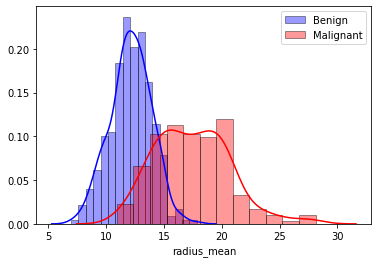

In [0]:
# Distribution plot 
feature = "radius_mean"
sns.distplot( df[df['diagnosis'] == 0][feature] , color="blue", label = "Benign")
sns.distplot( df[df['diagnosis'] == 1][feature] , color="red", label = "Malignant")
plt.legend()


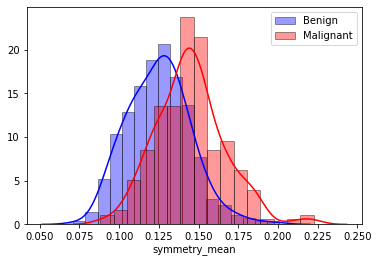

In [0]:
# Distribution plot 
feature = "symmetry_mean"
sns.distplot( df[df['diagnosis'] == 0][feature] , color="blue", label = "Benign")
sns.distplot( df[df['diagnosis'] == 1][feature] , color="red", label = "Malignant")
plt.legend()

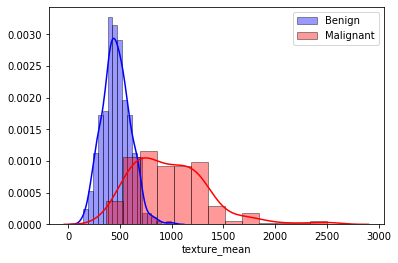

In [0]:
# Distribution graph for smoothness properties
# skyblue colour for benign tumor and red colour for malignant tumor
feature = "texture_mean"
sns.distplot( df[df['diagnosis'] == 0][feature] , color="blue", label = "Benign")
sns.distplot( df[df['diagnosis'] == 1][feature] , color="red", label = "Malignant")
plt.legend()

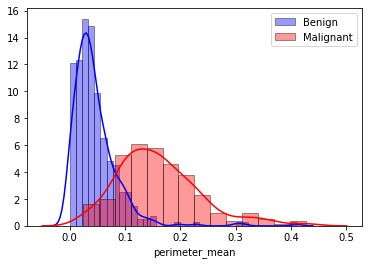

In [0]:
# Distribution graph for smoothness properties
# skyblue colour for benign tumor and red colour for malignant tumor
feature = "perimeter_mean"
sns.distplot( df[df['diagnosis'] == 0][feature] , color="blue", label = "Benign")
sns.distplot( df[df['diagnosis'] == 1][feature] , color="red", label = "Malignant")
plt.legend()

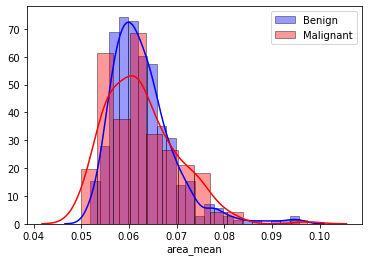

In [0]:
# Distribution graph for smoothness properties
# skyblue colour for benign tumor and red colour for malignant tumor
feature = "area_mean"
sns.distplot( df[df['diagnosis'] == 0][feature] , color="blue", label = "Benign")
sns.distplot( df[df['diagnosis'] == 1][feature] , color="red", label = "Malignant")
plt.legend()

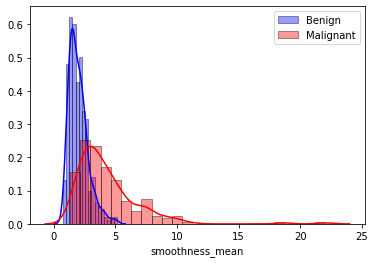

In [0]:
# Distribution graph for smoothness properties
# skyblue colour for benign tumor and red colour for malignant tumor
feature = "smoothness_mean"
sns.distplot( df[df['diagnosis'] == 0][feature] , color="blue", label = "Benign")
sns.distplot( df[df['diagnosis'] == 1][feature] , color="red", label = "Malignant")
plt.legend()

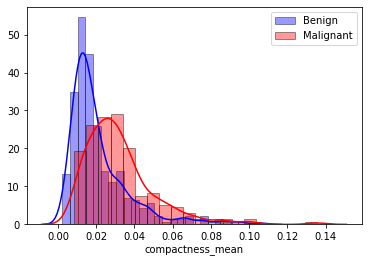

In [0]:
feature = "compactness_mean"
sns.distplot( df[df['diagnosis'] == 0][feature] , color="blue", label = "Benign")
sns.distplot( df[df['diagnosis'] == 1][feature] , color="red", label = "Malignant")
plt.legend()

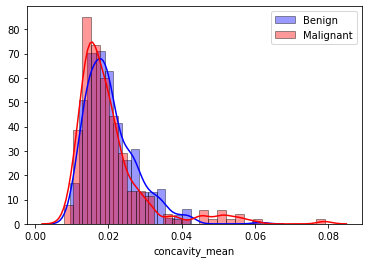

In [0]:
feature = "concavity_mean"
sns.distplot( df[df['diagnosis'] == 0][feature] , color="blue", label = "Benign")
sns.distplot( df[df['diagnosis'] == 1][feature] , color="red", label = "Malignant")
plt.legend()

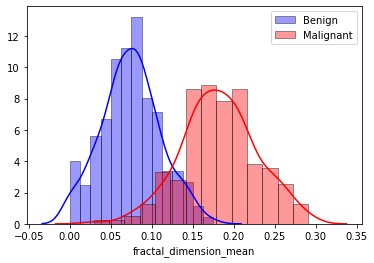

In [0]:
feature = "fractal_dimension_mean"
sns.distplot( df[df['diagnosis'] == 0][feature] , color="blue", label = "Benign")
sns.distplot( df[df['diagnosis'] == 1][feature] , color="red", label = "Malignant")
plt.legend()

#### Based on distribution plots it's obvious that some features are more effective on classification of the label. For example "fractal_distribution_mean" distribtions for two diffrent label classes (0 and 1) are well separated.

#### According to the distribition plots, some features that are predictive of a malignant tumor:
fractal_dimension_mean 
texture_mean 
radius_mean 
perimeter_mean
smoothness_mean

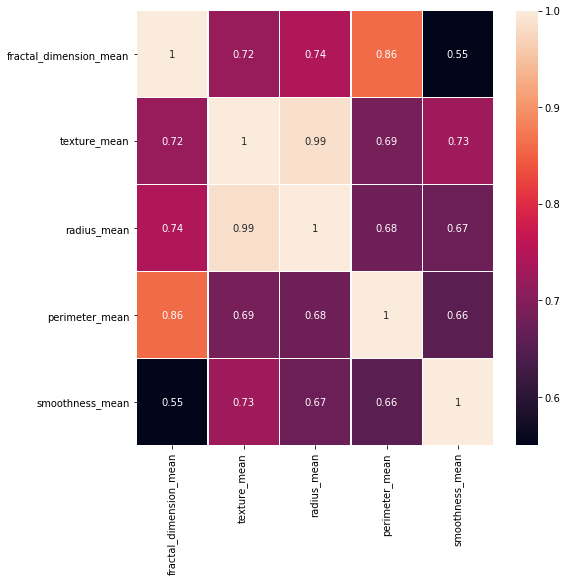

In [0]:
# Checking the correlation between the predictive variables
predictive = ['fractal_dimension_mean', 'texture_mean', 'radius_mean', 'perimeter_mean', 'smoothness_mean']
df_predictive = df[predictive]

# calculate the correlation matrix
corr_mat = df_predictive.corr()
# plot the heatmap
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, linewidths=.5, ax=ax)

It can be seen that some features are highly correlated. For example the correlation between (texture_mean, radius_mean) is 0.99, We can remove texture_mean from our predictive features. 

In [0]:
def num_of_outlier(data_frame, feature):
  Q1 = data_frame[feature].quantile(0.25)
  Q3 = data_frame[feature].quantile(0.75)
  IQR = Q3 - Q1
  outlier = (data_frame[feature] < (Q1 - 1.5 * IQR)) |(data_frame[feature] > (Q3 + 1.5 * IQR))
  num = sum(outlier)
  return num

print("Number of outliers for the feature {} is {}".format('fractal_dimension_mean', num_of_outlier(df, 'fractal_dimension_mean')))
print("Number of outliers for the feature {} is {}".format('radius_mean', num_of_outlier(df, 'radius_mean')))
print("Number of outliers for the feature {} is {}".format('perimeter_mean', num_of_outlier(df, 'perimeter_mean')))
print("Number of outliers for the feature {} is {}".format('smoothness_mean', num_of_outlier(df, 'smoothness_mean')))

Number of outliers for the feature fractal_dimension_mean is 0
Number of outliers for the feature radius_mean is 14
Number of outliers for the feature perimeter_mean is 18
Number of outliers for the feature smoothness_mean is 37


#### Based on the Number of outlier the best important features are 1-fractal_dimension_mean 2-radius_mean 3-perimeter_mean 4-smoothness_mean

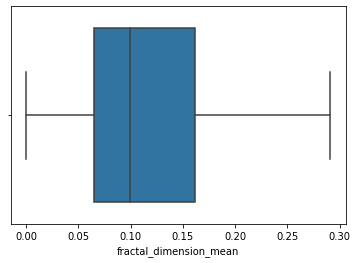

In [0]:
sns.boxplot(x=df['fractal_dimension_mean'])

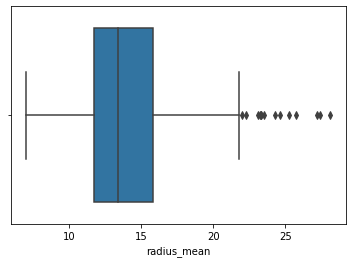

In [0]:
sns.boxplot(x=df["radius_mean"])

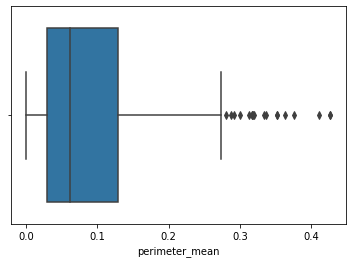

In [0]:
sns.boxplot(x=df['perimeter_mean'])

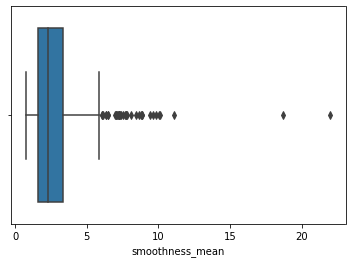

In [0]:
sns.boxplot(x=df['smoothness_mean'])

## 1.3 - Modeling

In [0]:
# Check distribution of diagnosis
print(df.diagnosis.value_counts())

0    357
1    211
Name: diagnosis, dtype: int64


The data is not balanced so we can perform oversampling before modeling

### 1.3.1 - Preprocessing

In [0]:
X = df.drop(["diagnosis", "texture_mean", "ID"], axis = 1)
y = df["diagnosis"]

In [0]:
# Split the data to train and test
from sklearn.model_selection import train_test_split

seed = 0 # the experiments can be replicated

# 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [0]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# changing to data frame
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)


In [0]:
# perform oversampling on the training set 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=seed)
X_train_sm, y_train_sm = sm.fit_sample(X_train_sc, y_train)

X_train_sm = pd.DataFrame(data=X_train_sm, columns=X_train_sc.columns )
y_train_sm = pd.DataFrame(data=y_train_sm, columns=["diagnosis"])

### 1.4 - Random Forest Classifier

In [0]:
from sklearn.model_selection import ParameterGrid 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

param = {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100, 'random_state': 0, 'verbose': 0}

rf = RandomForestClassifier(**param)
rf.fit(X_train_sm, y_train_sm)  # training stage

print("Performance (test set): \n")

y_pre = rf.predict(X_test_sc) # predictions
y_pro = rf.predict_proba(X_test_sc)[:, 1]

y_pre_train = rf.predict(X_train_sm) # predictions
y_pro_train = rf.predict_proba(X_train_sm)[:, 1]

print("AUC Score : %.4f" % roc_auc_score(y_test, y_pro))
print("Accuracy : %.4f \n" % accuracy_score(y_test, y_pre))

print("\nPerformance (train set): \n")

print("AUC Score : %.4f" % roc_auc_score(y_train_sm, y_pro_train))
print("Accuracy : %.4f \n" % accuracy_score(y_train_sm, y_pre_train))

print("Report of metrics on the test set:\n")
print("Accuracy score: {}".format(accuracy_score(y_test, y_pre)))
print("f1 score: {}".format(f1_score(y_test, y_pre)))
print("="*60)
print(classification_report(y_test, y_pre))

Performance (test set): 

AUC Score : 0.9808
Accuracy : 0.9298 


Performance (train set): 

AUC Score : 0.9976
Accuracy : 0.9825 

Report of metrics on the test set:

Accuracy score: 0.9298245614035088
f1 score: 0.909090909090909
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        72
           1       0.87      0.95      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



Text(0.5, 1.0, 'The Most Important Features')

findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.


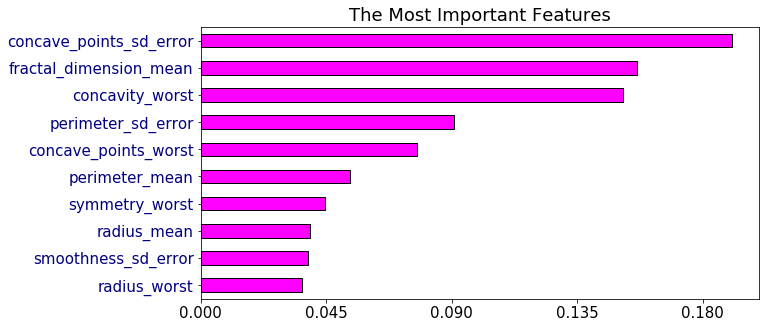

In [0]:
# The most important features
n = 10 # top 10 features
pd.Series(rf.feature_importances_, index=X_train.columns).nlargest(10).plot(kind='barh', figsize=[10, 10/2], color='magenta').invert_yaxis()    #  important feature in descending order
ticks_x = np.linspace(0, 0.18, 5)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=15, color='black')
plt.yticks(size=15, color='navy' )
plt.title('The Most Important Features', family='fantasy', size=18)

The most impartant features are coming at the top of trees and less important at the buttom of the trees.

In Random forest overfitting can be controled by the number of trees, the number of features that are randomly chosen to grow each tree from the bootstrapped data.




### 1.5 - xgboost

In [0]:
from xgboost import XGBClassifier, plot_importance

param = {'colsample_bylevel': 0.8, 'eta': 0.1, 'max_depth': 2, 'n_estimators': 50, 'objective': 'binary:logistic', 'seed': 0}

xgb = XGBClassifier(**param)
xgb.fit(X_train_sm, y_train_sm)  # training stage

print("Performance (test set): \n")

y_pre = xgb.predict(X_test_sc) # predictions
y_pro = xgb.predict_proba(X_test_sc)[:, 1]

y_pre_train = rf.predict(X_train_sm) # predictions
y_pro_train = rf.predict_proba(X_train_sm)[:, 1]

print("AUC Score : %.4f" % roc_auc_score(y_test, y_pro))
print("Accuracy : %.4f \n" % accuracy_score(y_test, y_pre))

print("\nPerformance (train set): \n")

print("AUC Score : %.4f" % roc_auc_score(y_train_sm, y_pro_train))
print("Accuracy : %.4f \n" % accuracy_score(y_train_sm, y_pre_train))

print("Report of metrics on the test set:\n")
print("Accuracy score: {}".format(accuracy_score(y_test, y_pre)))
print("f1 score: {}".format(f1_score(y_test, y_pre)))
print("="*60)
print(classification_report(y_test, y_pre))

Performance (test set): 

AUC Score : 0.9835
Accuracy : 0.9737 


Performance (train set): 

AUC Score : 0.9976
Accuracy : 0.9825 

Report of metrics on the test set:

Accuracy score: 0.9736842105263158
f1 score: 0.9647058823529412
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



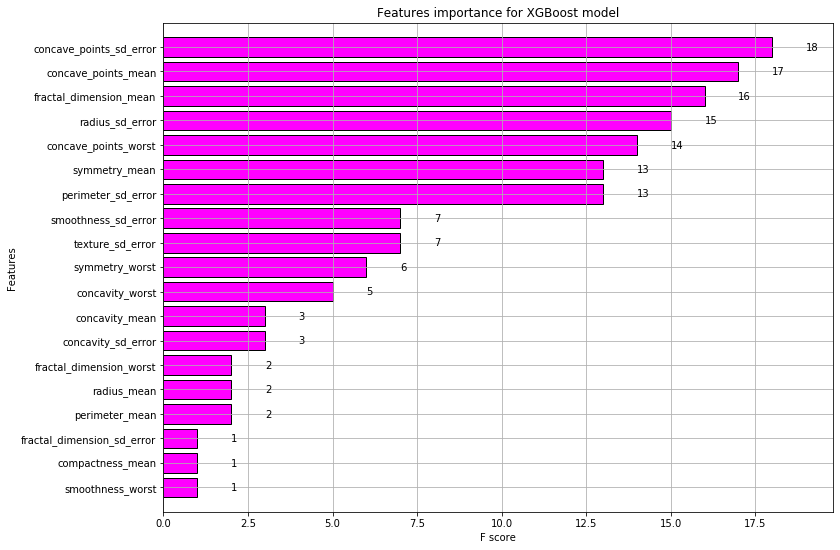

In [0]:
# importance_type = Weight => The number of times a feature is used to split the data across all trees.
fig, (ax) = plt.subplots(ncols=1, figsize=(12,9))
plot_importance(xgb, height=0.8, title="Features importance for XGBoost model", ax=ax, color="magenta") 
plt.show()

in Xgboost eta, max_depth, subsample control the overfitting

### 1.6 - Explanation to Technical Audience

We have used two common methods Random forest and xgboost to predict our labels. The f1 score for random forest is 0.91. while the f1 score for xgboost is 0.964. 
For xgboost the AUC score for the training dataset is 0.9976 and for the testing data set is 0.9835.
For random forest the AUC score is 0.9976 for the training set but for testing is 0.9808. Based on the f1 score and AUC we can conclude that xgboost performance is better than random forest. 
Since the difference in the evaluation metrics between the training and testing data set is not high we can conclude that our model do not suffer from overfitting.
To imrpve our model we can perform hyperparameter tuning and kfold cross validation. Since it's a binary classfication problem we can check hyperparameter tuning on the threshold as well. The default threshold is 0.5

### 1.7 - Explanation to Non-Technical Audiences

Using the machine learning tenchniques we can predict malignant vs benign tumor. We have used two classification methods. our models takes different input features like radius_mean, area_mean, symmetry_mean and identifies (diagnose) malignant vs benign tumor. In our prediction, we can reach to 97% accuracy.

Based on our xgboost model prediction, the most import features having impact on the diagnosis are concave_points_sd_error, concave_points_mean, fractal_dimension_mean, radius_sd_error, etc. 

## DSI Instructor Task: Part 2

## 2.1 - Code

**Student sample 1:**
* train_test_split has been imported but not used
* LinearRegression needs to be imported from sklearn.linear_model
* data loaded into d dataframe but used as data
* cv=1 in cross_val_score
* cross_val_score and train_test_split could be imported in one import line
* cross_val_score has used x2 instead of label x1
* x1 is 1-D array and can't be used for prediction
* We need to use label encoder before using pd.get_dummies
* cross_val_score has been imported twice

**Student sample 2:**
* comments could be more meaningful
* X should be a data frame to be used on cross validation
* pd.get_dummies as mentioned in studen 1



### 2.2 - Methodology

**Student sample 1 & 2:**

*   Data should be evaluated for missing values
*   There should be a check for correlated features   
*   No explaratory data analysis
*   There is no feature engineering/scaling









### 2.3 - Conceptual Understanding

**Student Sample 1:**

*   It failed to create train and test set completely and the student needs to review how to create the train and test set
*   Python concept is need to review as there is redundancy in the code
*   Feature engineering needs to be reviwed as well
*   The student needs to review concept of cross validation
*   No EDA

**Student Sample 2**

*   Code quality is good but can imrove the comments
*   No EDA
*   Feature engineering needs to be reviewed for the student

